In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tongpython_cat_and_dog_path = kagglehub.dataset_download('tongpython/cat-and-dog')
ajayrao43_catimage_path = kagglehub.dataset_download('ajayrao43/catimage')
ajayrao43_dog_dataset_path = kagglehub.dataset_download('ajayrao43/dog-dataset')
ajayrao43_dog_dataset_2_path = kagglehub.dataset_download('ajayrao43/dog-dataset-2')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catimage/pexels-pixabay-45201.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,Flatten,MaxPooling2D,BatchNormalization , Dropout

2025-10-01 09:11:54.588998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759309914.834479      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759309914.904321      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cat-and-dog/training_set',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)
val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cat-and-dog/test_set',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)


Found 8005 files belonging to 1 classes.
Using 6404 files for training.


2025-10-01 09:12:15.915101: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 2023 files belonging to 1 classes.
Using 1619 files for training.


In [ ]:
#Normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [ ]:
# create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=val_data)
history

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 169s 839ms/step - accuracy: 1.0000 - loss: 3.6991e-23 - val_accuracy: 1.0000 - val_loss: 1.2645e-25
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 168s 833ms/step - accuracy: 1.0000 - loss: 1.4464e-22 - val_accuracy: 1.0000 - val_loss: 1.7763e-25
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 170s 846ms/step - accuracy: 1.0000 - loss: 4.8070e-21 - val_accuracy: 1.0000 - val_loss: 1.7939e-25
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 167s 832ms/step - accuracy: 1.0000 - loss: 1.4055e-15 - val_accuracy: 1.0000 - val_loss: 1.8451e-25
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 166s 826ms/step - accuracy: 1.0000 - loss: 5.8048e-22 - val_accuracy: 1.0000 - val_loss: 1.4722e-25
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 206s 846ms/step - accuracy: 1.0000 - loss: 1.2368e-20 - val_accuracy: 1.0000 - val_loss: 1.7924e-25
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 170s 843ms/step - accuracy: 1.0000 - loss: 2.4219e-19 - val_accuracy: 1.0000 - val_loss: 1.5440e-25
Epoch 8/10
201/201 ━

In [ ]:
import cv2

 import cv2

In [ ]:
test_img=cv2.imread('/kaggle/input/catimage')

In [ ]:
import matplotlib.pyplot as plt

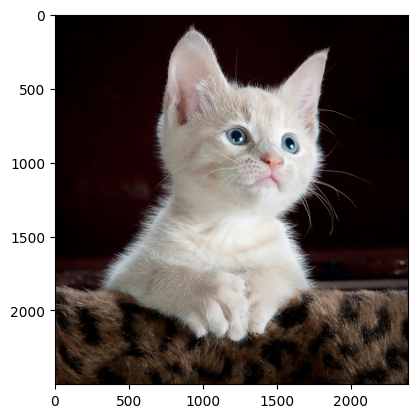

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/kaggle/input/catimage/pexels-pixabay-45201.jpg')
arr = np.array(img)

plt.imshow(arr)
plt.axis('on')
plt.show()


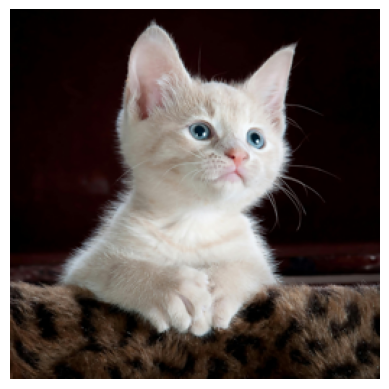

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/input/catimage/pexels-pixabay-45201.jpg")

new_size = (256, 256)
resized_img = img.resize(new_size)
resized_img.save("resized_image.jpg")

# Instead of show(), use matplotlib
plt.imshow(resized_img)
plt.axis('off')  # Hide axes
plt.show()


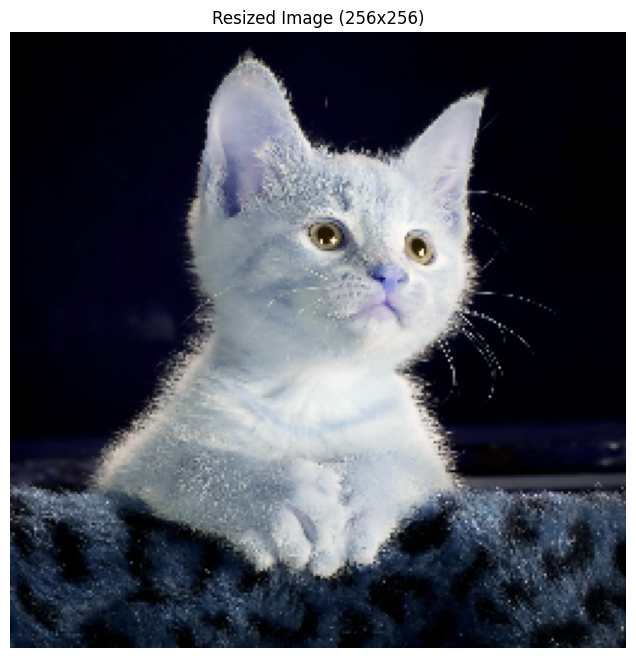

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using PIL
img = Image.open("/kaggle/input/catimage/pexels-pixabay-45201.jpg")

# Convert PIL Image to numpy array
img_np = np.array(img)

# Resize using OpenCV
resized_img = cv2.resize(img_np, (256, 256))

# Convert BGR to RGB if needed (OpenCV uses BGR, matplotlib uses RGB)
if len(resized_img.shape) == 3 and resized_img.shape[2] == 3:
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
else:
    resized_img_rgb = resized_img

# Save the image
cv2.imwrite("resized_image.jpg", resized_img)

# Display using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(resized_img_rgb)
plt.axis('off')
plt.title("Resized Image (256x256)")
plt.show()

In [ ]:
from PIL import Image
import numpy as np

# Load, resize, convert to array, and reshape in one go
test_input = np.array(Image.open("/kaggle/input/catimage/pexels-pixabay-45201.jpg").resize((256, 256))).reshape((1, 256, 256, 3))

print(f"Final shape: {test_input.shape}")

Final shape: (1, 256, 256, 3)


In [ ]:
from PIL import Image
import numpy as np

# Load and preprocess image
img = Image.open("/kaggle/input/catimage/pexels-pixabay-45201.jpg")
resized_img = img.resize((128, 128))  # Must be 128x128 for your model
img_array = np.array(resized_img)

# Normalize pixel values (0-255 to 0-1) if your model expects normalized inputs
img_array = img_array.astype('float32') / 255.0

# Reshape to (batch_size, height, width, channels)
test_input = img_array.reshape(1, 128, 128, 3)

print(f"Final input shape: {test_input.shape}")

# Predict
predictions = model.predict(test_input)
print("Predictions shape:", predictions.shape)
print("Predictions:", predictions)

Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predictions shape: (1, 1)
Predictions: [[0.]]


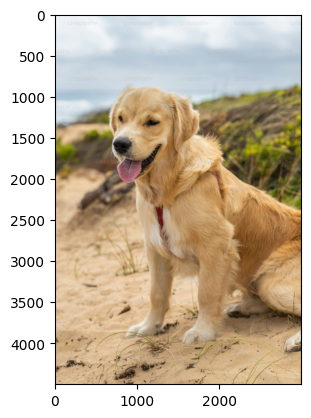

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/kaggle/input/dog-dataset-2/premium_photo-1666777247416-ee7a95235559.jpeg')
arr = np.array(img)

plt.imshow(arr)
plt.axis('on')
plt.show()


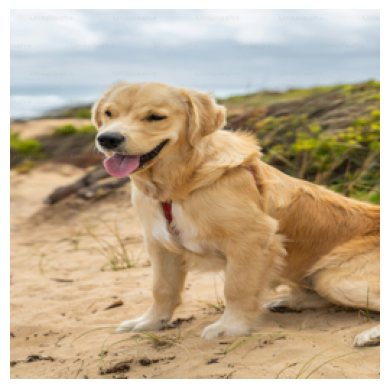

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/input/dog-dataset-2/premium_photo-1666777247416-ee7a95235559.jpeg")

new_size = (256, 256)
resized_img = img.resize(new_size)
resized_img.save("resized_image.jpg")

# Instead of show(), use matplotlib
plt.imshow(resized_img)
plt.axis('off')  # Hide axes
plt.show()


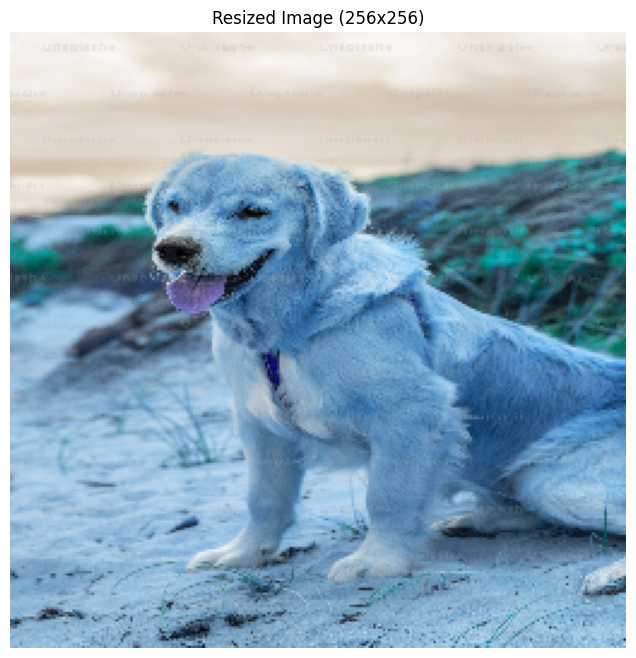

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using PIL
img = Image.open("/kaggle/input/dog-dataset-2/premium_photo-1666777247416-ee7a95235559.jpeg")

# Convert PIL Image to numpy array
img_np = np.array(img)

# Resize using OpenCV
resized_img = cv2.resize(img_np, (256, 256))

# Convert BGR to RGB if needed (OpenCV uses BGR, matplotlib uses RGB)
if len(resized_img.shape) == 3 and resized_img.shape[2] == 3:
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
else:
    resized_img_rgb = resized_img

# Save the image
cv2.imwrite("resized_image.jpg", resized_img)

# Display using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(resized_img_rgb)
plt.axis('off')
plt.title("Resized Image (256x256)")
plt.show()

In [ ]:
from PIL import Image
import numpy as np

# Load and preprocess image
img = Image.open("/kaggle/input/dog-dataset-2/premium_photo-1666777247416-ee7a95235559.jpeg")
resized_img = img.resize((128, 128))  # Must be 128x128 for your model
img_array = np.array(resized_img)

# Normalize pixel values (0-255 to 0-1) if your model expects normalized inputs
img_array = img_array.astype('float32') / 255.0

# Reshape to (batch_size, height, width, channels)
test_input = img_array.reshape(1, 128, 128, 3)

print(f"Final input shape: {test_input.shape}")

# Predict
predictions = model.predict(test_input)
print("Predictions shape:", predictions.shape)
print("Predictions:", predictions)

Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predictions shape: (1, 1)
Predictions: [[0.]]
